In [2]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

df= pd.read_csv('../datasets/normalized_sample_emissions_for_anomaly_detection.csv')
df.head()

,Identifiant de l'élément,Nom base français,normalized_emissions,modifed_emissions,true_anomaly
0,34052,"""""""\tSalade César au poulet (salade verte""""""",0.044497,0.044497,0
1,40963,"""""""Barre céréalière """"""""équilibre"""""""" aux frui...",0.038913,0.038913,0
2,40964,"""""""Barre céréalière """"""""équilibre"""""""" chocolat...",0.096827,0.968267,1
3,39789,"""""""Bière """"""""coeur de marché"""""""" (4-5° alcool)""""""",0.017534,0.017534,0
4,39790,"""""""Bière """"""""de spécialités"""""""" ou d'abbaye""""""",0.017534,0.017534,0


In [3]:
X_train  = df['normalized_emissions'].values.reshape(-1,1)
X_test = df['modifed_emissions'].values.reshape(-1, 1)

In [10]:
from pyod.models.auto_encoder import AutoEncoder

model = AutoEncoder(
    contamination=0.02,
    lr=0.01,
    hidden_neuron_list=[64, 32,64,32],
    epoch_num=40, 
    batch_size=16,
    dropout_rate=0.1,
    verbose=1,
    random_state=19
)


Training:   0%|          | 0/40 [00:00<?, ?it/s]

Training: 100%|██████████| 40/40 [00:26<00:00,  1.50it/s]



 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4219
           1       0.47      0.90      0.62        83

    accuracy                           0.98      4302
   macro avg       0.73      0.94      0.80      4302
weighted avg       0.99      0.98      0.98      4302



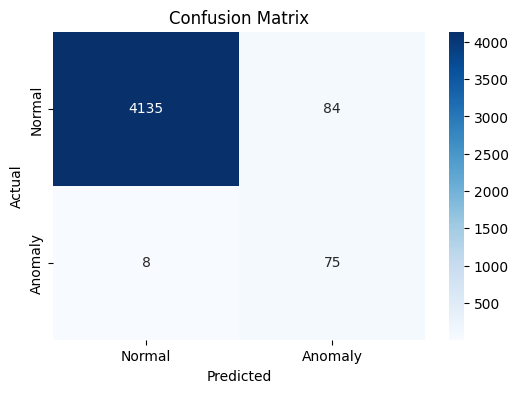

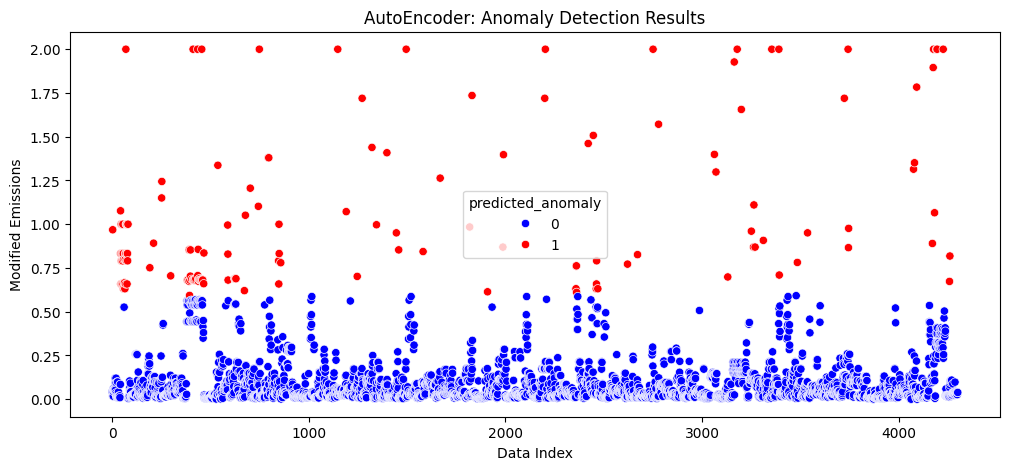

In [ ]:
model.fit(X_train)

predictions = model.predict(X_test)

scores = model.decision_function(X_test)         

true_labels = df['true_anomaly'].values

df['predicted_anomaly'] = predictions


print("\n Classification Report:")
print(classification_report(true_labels, predictions))

cm = confusion_matrix(true_labels, predictions)
labels = ['Normal', 'Anomaly']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#
plt.figure(figsize=(12, 5))
sns.scatterplot(
    x=range(len(df)),
    y=df['modifed_emissions'],
    hue=df['predicted_anomaly'],
    palette={0: 'blue', 1: 'red'},
    legend='full'
)
plt.title("AutoEncoder: Anomaly Detection Results")
plt.xlabel("Data Index")
plt.ylabel("Modified Emissions")
plt.show()





### Autoencoder generally shine on complex data. So our 1D numerical values gives okay results. Auto encoder should be considered when we  work with timed series data (LTSM autoencoder) or non linear data. 